In [2]:
!unzip '/content/archive.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Alzheimer_s Dataset/train/NonDemented/non_1395.jpg  
  inflating: Alzheimer_s Dataset/train/NonDemented/non_1396.jpg  
  inflating: Alzheimer_s Dataset/train/NonDemented/non_1397.jpg  
  inflating: Alzheimer_s Dataset/train/NonDemented/non_1398.jpg  
  inflating: Alzheimer_s Dataset/train/NonDemented/non_1399.jpg  
  inflating: Alzheimer_s Dataset/train/NonDemented/non_14.jpg  
  inflating: Alzheimer_s Dataset/train/NonDemented/non_140.jpg  
  inflating: Alzheimer_s Dataset/train/NonDemented/non_1400.jpg  
  inflating: Alzheimer_s Dataset/train/NonDemented/non_1401.jpg  
  inflating: Alzheimer_s Dataset/train/NonDemented/non_1402.jpg  
  inflating: Alzheimer_s Dataset/train/NonDemented/non_1403.jpg  
  inflating: Alzheimer_s Dataset/train/NonDemented/non_1404.jpg  
  inflating: Alzheimer_s Dataset/train/NonDemented/non_1405.jpg  
  inflating: Alzheimer_s Dataset/train/NonDemented/non_1406.jpg  
  inflating: Alzheimer_s Dat

In [6]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to your train and test folders
train_dir = '/content/Alzheimer_s Dataset/train'
test_dir = '/content/Alzheimer_s Dataset/test'

# Define class names
class_names = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
num_classes = len(class_names)

# Create data generators with augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # using 20% for validation
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.
Found 6400 images belonging to 4 classes.


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

def build_cnn2_model(input_shape=(224, 224, 3), num_classes=4):
    model = Sequential()

    # First Conv Block
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))

    # Second Conv Block
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))

    # Third Conv Block
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))

    # Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Create model
model = build_cnn2_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 25,981,220 (99.11 MB)

 Trainable params: 25,979,812 (99.11 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [10]:
# Compile the model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Checking for Class Imbalance in Your Alzheimer's Dataset

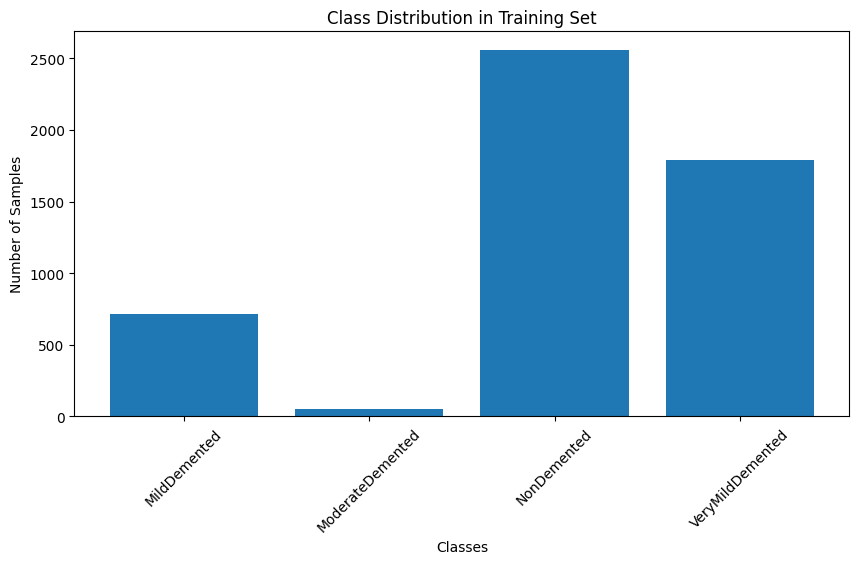

Training Set Class Distribution:
MildDemented: 717 samples (14.0%)
ModerateDemented: 52 samples (1.0%)
NonDemented: 2560 samples (50.0%)
VeryMildDemented: 1792 samples (35.0%)


In [16]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight

# Get class counts from your train generator
train_class_counts = train_generator.classes
class_names = list(train_generator.class_indices.keys())

# Count samples per class
unique, counts = np.unique(train_class_counts, return_counts=True)
class_distribution = dict(zip(class_names, counts))

# Plot the distribution
plt.figure(figsize=(10, 5))
plt.bar(class_distribution.keys(), class_distribution.values())
plt.title('Class Distribution in Training Set')
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.show()

# Print exact numbers
print("Training Set Class Distribution:")
for class_name, count in class_distribution.items():
    print(f"{class_name}: {count} samples ({count/sum(counts)*100:.1f}%)")


Training Set Class Distribution:
ModerateDemented: 64 samples
MildDemented: 896 samples
NonDemented: 3200 samples
VeryMildDemented: 2240 samples

Test Set Class Distribution:
ModerateDemented: 64 samples
MildDemented: 896 samples
NonDemented: 3200 samples
VeryMildDemented: 2240 samples


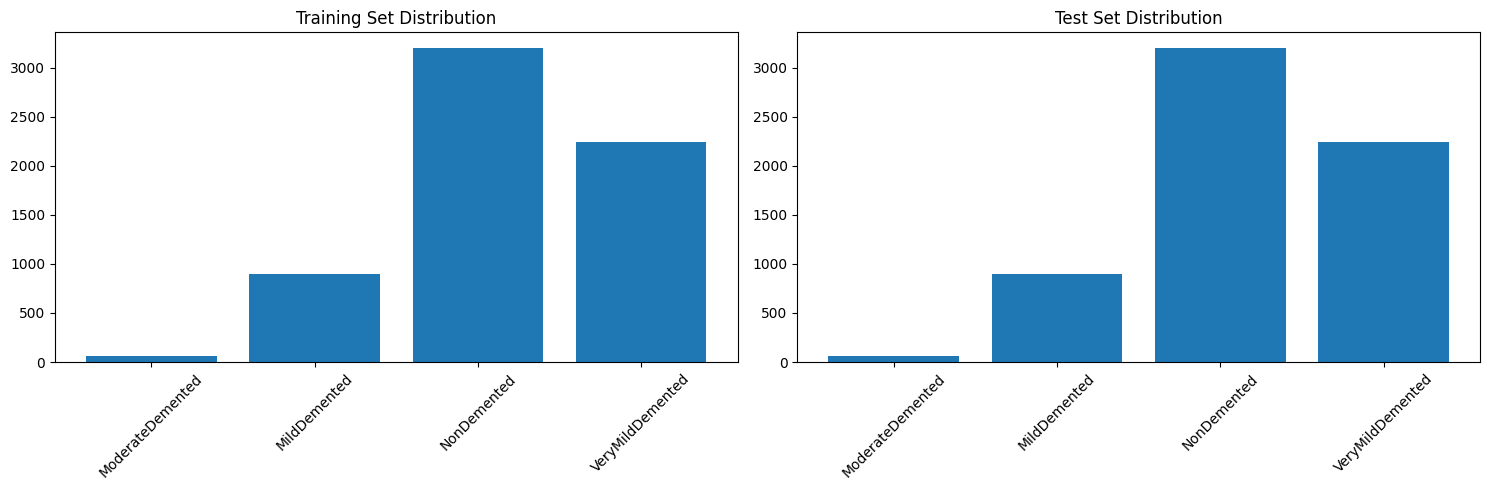

In [17]:
def check_class_distribution(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

# Check training set distribution
train_dist = check_class_distribution(train_dir)
print("\nTraining Set Class Distribution:")
for class_name, count in train_dist.items():
    print(f"{class_name}: {count} samples")

# Check test set distribution
test_dist = check_class_distribution(test_dir)
print("\nTest Set Class Distribution:")
for class_name, count in test_dist.items():
    print(f"{class_name}: {count} samples")

# Plot comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.bar(train_dist.keys(), train_dist.values())
ax1.set_title('Training Set Distribution')
ax1.tick_params(axis='x', rotation=45)
ax2.bar(test_dist.keys(), test_dist.values())
ax2.set_title('Test Set Distribution')
ax2.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [19]:
train_dir = '/content/Alzheimer_s Dataset/train'
test_dir = '/content/Alzheimer_s Dataset/test'

## Check Class Distribution

In [20]:
def get_class_distribution(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

train_dist = get_class_distribution(train_dir)
test_dist = get_class_distribution(test_dir)

print("Training Set Distribution:", train_dist)
print("Test Set Distribution:", test_dist)

Training Set Distribution: {'ModerateDemented': 64, 'MildDemented': 896, 'NonDemented': 3200, 'VeryMildDemented': 2240}
Test Set Distribution: {'ModerateDemented': 64, 'MildDemented': 896, 'NonDemented': 3200, 'VeryMildDemented': 2240}


##Visualize Class Imbalance

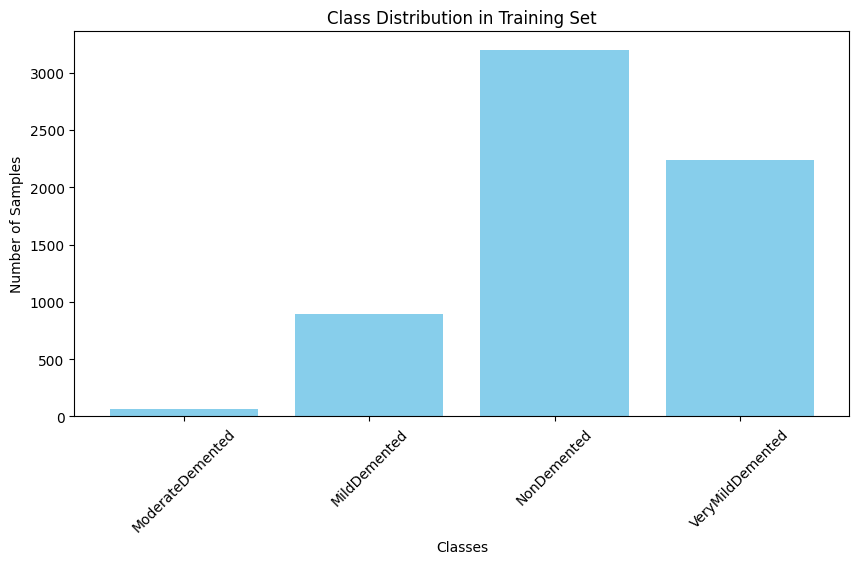

In [21]:
plt.figure(figsize=(10, 5))
plt.bar(train_dist.keys(), train_dist.values(), color='skyblue')
plt.title("Class Distribution in Training Set")
plt.xlabel("Classes")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.show()

##Compute Class Weights

In [22]:
# Get class labels (assuming using ImageDataGenerator later)
train_labels = []
for class_name, count in train_dist.items():
    train_labels.extend([class_name] * count)

# Calculate class weights
class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(train_labels),
    y=train_labels
)
class_weights = dict(enumerate(class_weights))

print("Class Weights:", class_weights)

Class Weights: {0: np.float64(1.7857142857142858), 1: np.float64(25.0), 2: np.float64(0.5), 3: np.float64(0.7142857142857143)}


##Set Up Data Generators with Augmentation

In [23]:
# Heavy augmentation for minority classes
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Train generator (will use class weights later)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.
Found 6400 images belonging to 4 classes.


##Model Implementation

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

def focal_loss(gamma=2.0, alpha=0.25):
    def loss(y_true, y_pred):
        # Focal loss implementation
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1 - 1e-7)
        ce = -y_true * tf.math.log(y_pred)
        weight = y_true * tf.pow(1 - y_pred, gamma)
        fl = alpha * weight * ce
        return tf.reduce_mean(fl)
    return loss

def build_imbalance_aware_cnn(input_shape=(224, 224, 3), num_classes=4):
    model = Sequential()

    # Block 1 (Heavier filters for rare classes)
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))  # Higher dropout for regularization

    # Block 2
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))

    # Block 3 (Deeper for rare class features)
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.5))

    # Classifier Head (Wider for imbalance)
    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.6))  # Aggressive dropout to prevent overfitting
    model.add(Dense(num_classes, activation='softmax'))

    return model

model = build_imbalance_aware_cnn()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │   102,760,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 103,914,052 (396.40 MB)

 Trainable params: 103,911,236 (396.39 MB)

 Non-trainable params: 2,816 (11.00 KB)

##Compile with Focal Loss & Class Weights

In [25]:
optimizer = Adam(learning_rate=0.0001)  # Lower LR for stable training
model.compile(
    optimizer=optimizer,
    loss=focal_loss(),  # From Step 1
    metrics=['accuracy',
             tf.keras.metrics.AUC(name='auc'),  # Better for imbalance
             tf.keras.metrics.Recall(name='recall')]  # Critical for medical cases
)

##Callbacks for Imbalanced Data

In [26]:
from tensorflow.keras.callbacks import (
    ModelCheckpoint,
    EarlyStopping,
    ReduceLROnPlateau,
    CSVLogger
)

callbacks = [
    EarlyStopping(monitor='val_auc', patience=15, mode='max', verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, verbose=1),
    ModelCheckpoint(
        'best_model_imbalanced.h5',
        monitor='val_auc',
        save_best_only=True,
        mode='max'
    ),
    CSVLogger('training_log.csv')  # Log progress
]

In [27]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=100,  # More epochs for convergence
    callbacks=callbacks,
    class_weight=class_weights,  # From Step 1
    verbose=1
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 547ms/step - accuracy: 0.3017 - auc: 0.5490 - loss: 7.4896 - recall: 0.2403

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


160/160 ━━━━━━━━━━━━━━━━━━━━ 162s 795ms/step - accuracy: 0.3019 - auc: 0.5492 - loss: 7.4755 - recall: 0.2404 - val_accuracy: 0.4976 - val_auc: 0.6651 - val_loss: 2.2771 - val_recall: 0.4976 - learning_rate: 1.0000e-04
Epoch 2/100
  1/160 ━━━━━━━━━━━━━━━━━━━━ 57s 363ms/step - accuracy: 0.3125 - auc: 0.6214 - loss: 2.1067 - recall: 0.2500

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


160/160 ━━━━━━━━━━━━━━━━━━━━ 28s 172ms/step - accuracy: 0.3125 - auc: 0.6214 - loss: 2.1067 - recall: 0.2500 - val_accuracy: 0.5032 - val_auc: 0.6688 - val_loss: 2.2587 - val_recall: 0.5032 - learning_rate: 1.0000e-04
Epoch 3/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step - accuracy: 0.3560 - auc: 0.6028 - loss: 1.5524 - recall: 0.2652

160/160 ━━━━━━━━━━━━━━━━━━━━ 139s 869ms/step - accuracy: 0.3560 - auc: 0.6029 - loss: 1.5501 - recall: 0.2652 - val_accuracy: 0.3766 - val_auc: 0.7365 - val_loss: 0.6399 - val_recall: 0.3766 - learning_rate: 1.0000e-04
Epoch 4/100
  1/160 ━━━━━━━━━━━━━━━━━━━━ 55s 349ms/step - accuracy: 0.4062 - auc: 0.6367 - loss: 0.6213 - recall: 0.3438

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


160/160 ━━━━━━━━━━━━━━━━━━━━ 24s 150ms/step - accuracy: 0.4062 - auc: 0.6367 - loss: 0.6213 - recall: 0.3438 - val_accuracy: 0.3782 - val_auc: 0.7375 - val_loss: 0.6347 - val_recall: 0.3766 - learning_rate: 1.0000e-04
Epoch 5/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - accuracy: 0.3868 - auc: 0.6386 - loss: 0.5500 - recall: 0.2973

160/160 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.3869 - auc: 0.6387 - loss: 0.5495 - recall: 0.2974 - val_accuracy: 0.4014 - val_auc: 0.7448 - val_loss: 0.3737 - val_recall: 0.4014 - learning_rate: 1.0000e-04
Epoch 6/100
  1/160 ━━━━━━━━━━━━━━━━━━━━ 58s 367ms/step - accuracy: 0.3438 - auc: 0.6297 - loss: 0.3604 - recall: 0.2500

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


160/160 ━━━━━━━━━━━━━━━━━━━━ 16s 98ms/step - accuracy: 0.3438 - auc: 0.6297 - loss: 0.3604 - recall: 0.2500 - val_accuracy: 0.3966 - val_auc: 0.7382 - val_loss: 0.3731 - val_recall: 0.3902 - learning_rate: 1.0000e-04
Epoch 7/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 504ms/step - accuracy: 0.4259 - auc: 0.6839 - loss: 0.3498 - recall: 0.3278

160/160 ━━━━━━━━━━━━━━━━━━━━ 156s 974ms/step - accuracy: 0.4259 - auc: 0.6839 - loss: 0.3497 - recall: 0.3278 - val_accuracy: 0.4816 - val_auc: 0.7485 - val_loss: 0.4132 - val_recall: 0.4816 - learning_rate: 1.0000e-04
Epoch 8/100
  1/160 ━━━━━━━━━━━━━━━━━━━━ 56s 355ms/step - accuracy: 0.4062 - auc: 0.6379 - loss: 0.3532 - recall: 0.3438

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


160/160 ━━━━━━━━━━━━━━━━━━━━ 33s 203ms/step - accuracy: 0.4062 - auc: 0.6379 - loss: 0.3532 - recall: 0.3438 - val_accuracy: 0.5008 - val_auc: 0.7533 - val_loss: 0.3959 - val_recall: 0.4992 - learning_rate: 1.0000e-04
Epoch 9/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 125s 779ms/step - accuracy: 0.4590 - auc: 0.7237 - loss: 0.3079 - recall: 0.3415 - val_accuracy: 0.3526 - val_auc: 0.5901 - val_loss: 0.4946 - val_recall: 0.3325 - learning_rate: 1.0000e-04
Epoch 10/100
  1/160 ━━━━━━━━━━━━━━━━━━━━ 50s 315ms/step - accuracy: 0.3438 - auc: 0.7007 - loss: 0.2998 - recall: 0.2812

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


160/160 ━━━━━━━━━━━━━━━━━━━━ 16s 101ms/step - accuracy: 0.3438 - auc: 0.7007 - loss: 0.2998 - recall: 0.2812 - val_accuracy: 0.4030 - val_auc: 0.6054 - val_loss: 0.4878 - val_recall: 0.3574 - learning_rate: 1.0000e-04
Epoch 11/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 142s 889ms/step - accuracy: 0.4567 - auc: 0.7280 - loss: 0.2664 - recall: 0.3465 - val_accuracy: 0.3934 - val_auc: 0.6171 - val_loss: 0.4439 - val_recall: 0.3718 - learning_rate: 1.0000e-04
Epoch 12/100
  1/160 ━━━━━━━━━━━━━━━━━━━━ 50s 316ms/step - accuracy: 0.4062 - auc: 0.6701 - loss: 0.2540 - recall: 0.2500

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


160/160 ━━━━━━━━━━━━━━━━━━━━ 20s 121ms/step - accuracy: 0.4062 - auc: 0.6701 - loss: 0.2540 - recall: 0.2500 - val_accuracy: 0.3686 - val_auc: 0.6054 - val_loss: 0.4305 - val_recall: 0.3413 - learning_rate: 1.0000e-04
Epoch 13/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 132s 575ms/step - accuracy: 0.4635 - auc: 0.7405 - loss: 0.2675 - recall: 0.3562 - val_accuracy: 0.4343 - val_auc: 0.6610 - val_loss: 0.3078 - val_recall: 0.3750 - learning_rate: 1.0000e-04
Epoch 14/100
  1/160 ━━━━━━━━━━━━━━━━━━━━ 49s 309ms/step - accuracy: 0.2500 - auc: 0.5500 - loss: 0.2610 - recall: 0.1875

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


160/160 ━━━━━━━━━━━━━━━━━━━━ 21s 128ms/step - accuracy: 0.2500 - auc: 0.5500 - loss: 0.2610 - recall: 0.1875 - val_accuracy: 0.4503 - val_auc: 0.6756 - val_loss: 0.3020 - val_recall: 0.3806 - learning_rate: 1.0000e-04
Epoch 15/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 142s 706ms/step - accuracy: 0.4764 - auc: 0.7618 - loss: 0.2087 - recall: 0.3587 - val_accuracy: 0.4599 - val_auc: 0.7160 - val_loss: 0.2604 - val_recall: 0.4062 - learning_rate: 1.0000e-04
Epoch 16/100
  1/160 ━━━━━━━━━━━━━━━━━━━━ 49s 311ms/step - accuracy: 0.4062 - auc: 0.7049 - loss: 0.2047 - recall: 0.4062

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


160/160 ━━━━━━━━━━━━━━━━━━━━ 21s 129ms/step - accuracy: 0.4062 - auc: 0.7049 - loss: 0.2047 - recall: 0.4062 - val_accuracy: 0.4599 - val_auc: 0.7198 - val_loss: 0.2556 - val_recall: 0.4183 - learning_rate: 1.0000e-04
Epoch 17/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 142s 837ms/step - accuracy: 0.4808 - auc: 0.7672 - loss: 0.2170 - recall: 0.3522 - val_accuracy: 0.4527 - val_auc: 0.7099 - val_loss: 0.2464 - val_recall: 0.3630 - learning_rate: 1.0000e-04
Epoch 18/100
  1/160 ━━━━━━━━━━━━━━━━━━━━ 49s 314ms/step - accuracy: 0.5625 - auc: 0.8013 - loss: 0.1812 - recall: 0.4062

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


160/160 ━━━━━━━━━━━━━━━━━━━━ 20s 123ms/step - accuracy: 0.5625 - auc: 0.8013 - loss: 0.1812 - recall: 0.4062 - val_accuracy: 0.4655 - val_auc: 0.7185 - val_loss: 0.2445 - val_recall: 0.3646 - learning_rate: 1.0000e-04
Epoch 19/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - accuracy: 0.4979 - auc: 0.7835 - loss: 0.1824 - recall: 0.3568

160/160 ━━━━━━━━━━━━━━━━━━━━ 108s 673ms/step - accuracy: 0.4979 - auc: 0.7835 - loss: 0.1824 - recall: 0.3568 - val_accuracy: 0.4359 - val_auc: 0.7608 - val_loss: 0.2256 - val_recall: 0.4255 - learning_rate: 1.0000e-04
Epoch 20/100
  1/160 ━━━━━━━━━━━━━━━━━━━━ 59s 374ms/step - accuracy: 0.2500 - auc: 0.7432 - loss: 0.1829 - recall: 0.1562

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


160/160 ━━━━━━━━━━━━━━━━━━━━ 31s 191ms/step - accuracy: 0.2500 - auc: 0.7432 - loss: 0.1829 - recall: 0.1562 - val_accuracy: 0.4639 - val_auc: 0.7765 - val_loss: 0.2147 - val_recall: 0.4367 - learning_rate: 1.0000e-04
Epoch 21/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 127s 776ms/step - accuracy: 0.4887 - auc: 0.7881 - loss: 0.2037 - recall: 0.3362 - val_accuracy: 0.4856 - val_auc: 0.7597 - val_loss: 0.2021 - val_recall: 0.4183 - learning_rate: 1.0000e-04
Epoch 22/100
  1/160 ━━━━━━━━━━━━━━━━━━━━ 50s 317ms/step - accuracy: 0.5938 - auc: 0.8044 - loss: 0.1929 - recall: 0.4062

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


160/160 ━━━━━━━━━━━━━━━━━━━━ 17s 104ms/step - accuracy: 0.5938 - auc: 0.8044 - loss: 0.1929 - recall: 0.4062 - val_accuracy: 0.4880 - val_auc: 0.7588 - val_loss: 0.2019 - val_recall: 0.4327 - learning_rate: 1.0000e-04
Epoch 23/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 141s 878ms/step - accuracy: 0.4977 - auc: 0.7990 - loss: 0.1710 - recall: 0.3330 - val_accuracy: 0.3317 - val_auc: 0.6400 - val_loss: 0.2214 - val_recall: 0.3261 - learning_rate: 1.0000e-04
Epoch 24/100
  1/160 ━━━━━━━━━━━━━━━━━━━━ 51s 326ms/step - accuracy: 0.5312 - auc: 0.8301 - loss: 0.1257 - recall: 0.2812

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


160/160 ━━━━━━━━━━━━━━━━━━━━ 20s 123ms/step - accuracy: 0.5312 - auc: 0.8301 - loss: 0.1257 - recall: 0.2812 - val_accuracy: 0.3325 - val_auc: 0.6376 - val_loss: 0.2333 - val_recall: 0.3269 - learning_rate: 1.0000e-04
Epoch 25/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 93s 582ms/step - accuracy: 0.4922 - auc: 0.7948 - loss: 0.1434 - recall: 0.3292 - val_accuracy: 0.4583 - val_auc: 0.7685 - val_loss: 0.1412 - val_recall: 0.1835 - learning_rate: 1.0000e-04
Epoch 26/100
  1/160 ━━━━━━━━━━━━━━━━━━━━ 49s 309ms/step - accuracy: 0.4062 - auc: 0.7357 - loss: 0.1434 - recall: 0.2500

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


160/160 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.4062 - auc: 0.7357 - loss: 0.1434 - recall: 0.2500 - val_accuracy: 0.4575 - val_auc: 0.7670 - val_loss: 0.1399 - val_recall: 0.1787 - learning_rate: 1.0000e-04
Epoch 27/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 142s 887ms/step - accuracy: 0.5126 - auc: 0.8083 - loss: 0.1361 - recall: 0.3374 - val_accuracy: 0.3758 - val_auc: 0.6646 - val_loss: 0.1735 - val_recall: 0.2668 - learning_rate: 1.0000e-04
Epoch 28/100
  1/160 ━━━━━━━━━━━━━━━━━━━━ 49s 310ms/step - accuracy: 0.4375 - auc: 0.7630 - loss: 0.1244 - recall: 0.2812

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


160/160 ━━━━━━━━━━━━━━━━━━━━ 21s 131ms/step - accuracy: 0.4375 - auc: 0.7630 - loss: 0.1244 - recall: 0.2812 - val_accuracy: 0.3902 - val_auc: 0.6785 - val_loss: 0.1701 - val_recall: 0.2804 - learning_rate: 1.0000e-04
Epoch 29/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 142s 645ms/step - accuracy: 0.4850 - auc: 0.7968 - loss: 0.1350 - recall: 0.3132 - val_accuracy: 0.3574 - val_auc: 0.6895 - val_loss: 0.1650 - val_recall: 0.2548 - learning_rate: 1.0000e-04
Epoch 30/100
  1/160 ━━━━━━━━━━━━━━━━━━━━ 51s 325ms/step - accuracy: 0.6562 - auc: 0.8701 - loss: 0.1237 - recall: 0.4375

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


160/160 ━━━━━━━━━━━━━━━━━━━━ 16s 96ms/step - accuracy: 0.6562 - auc: 0.8701 - loss: 0.1237 - recall: 0.4375 - val_accuracy: 0.3438 - val_auc: 0.6796 - val_loss: 0.1682 - val_recall: 0.2428 - learning_rate: 1.0000e-04
Epoch 31/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 96s 600ms/step - accuracy: 0.4855 - auc: 0.8006 - loss: 0.1363 - recall: 0.3218 - val_accuracy: 0.4776 - val_auc: 0.7751 - val_loss: 0.1288 - val_recall: 0.3942 - learning_rate: 1.0000e-04
Epoch 32/100
  1/160 ━━━━━━━━━━━━━━━━━━━━ 49s 313ms/step - accuracy: 0.4062 - auc: 0.7376 - loss: 0.1181 - recall: 0.2500

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


160/160 ━━━━━━━━━━━━━━━━━━━━ 16s 97ms/step - accuracy: 0.4062 - auc: 0.7376 - loss: 0.1181 - recall: 0.2500 - val_accuracy: 0.4543 - val_auc: 0.7647 - val_loss: 0.1283 - val_recall: 0.3622 - learning_rate: 1.0000e-04
Epoch 33/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 142s 701ms/step - accuracy: 0.4965 - auc: 0.8019 - loss: 0.1378 - recall: 0.3187 - val_accuracy: 0.3141 - val_auc: 0.5917 - val_loss: 0.2486 - val_recall: 0.2812 - learning_rate: 1.0000e-04
Epoch 34/100
  1/160 ━━━━━━━━━━━━━━━━━━━━ 49s 310ms/step - accuracy: 0.5312 - auc: 0.8612 - loss: 0.1432 - recall: 0.3750

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


160/160 ━━━━━━━━━━━━━━━━━━━━ 16s 97ms/step - accuracy: 0.5312 - auc: 0.8612 - loss: 0.1432 - recall: 0.3750 - val_accuracy: 0.2604 - val_auc: 0.5474 - val_loss: 0.2743 - val_recall: 0.2196 - learning_rate: 1.0000e-04
Epoch 35/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 109s 592ms/step - accuracy: 0.5029 - auc: 0.8031 - loss: 0.1579 - recall: 0.3059 - val_accuracy: 0.3894 - val_auc: 0.7065 - val_loss: 0.1239 - val_recall: 0.3454 - learning_rate: 1.0000e-04
Epoch 35: early stopping


200/200 ━━━━━━━━━━━━━━━━━━━━ 22s 107ms/step
[3 3 3 ... 3 3 0]
[0 0 0 ... 3 3 3]


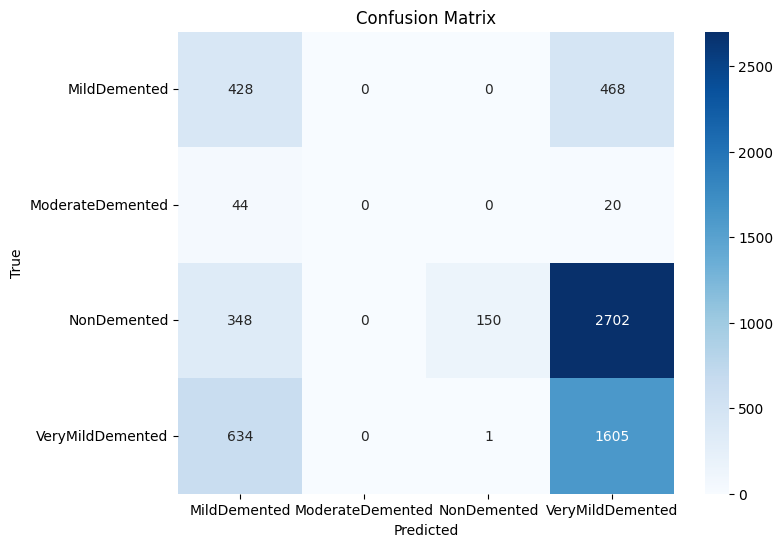

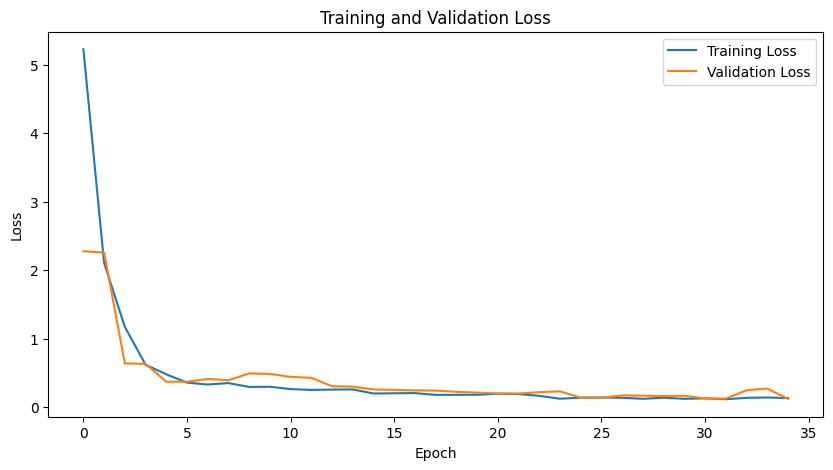

In [31]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Assuming 'history' is the training history object from model.fit
# and 'test_generator' is your test data generator

# Confusion Matrix
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
y_true = test_generator.classes
print(y_true)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Loss Plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


✅ Model loaded with custom objects!


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


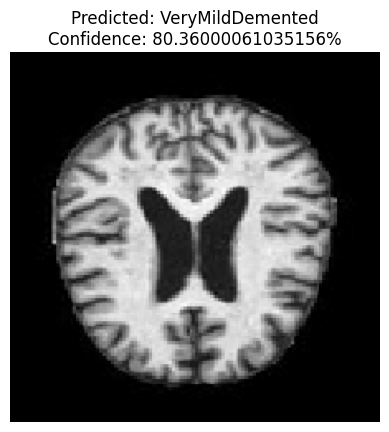


Detailed Predictions:
MildDemented: 2.859999895095825%
ModerateDemented: 1.2799999713897705%
NonDemented: 15.5%
VeryMildDemented: 80.36000061035156%


In [69]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# 1. First redefine ALL custom components exactly as used in training
def focal_loss(gamma=2.0, alpha=0.25):
    def loss(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1-1e-7)
        ce = -y_true * tf.math.log(y_pred)
        weight = y_true * tf.pow(1 - y_pred, gamma)
        fl = alpha * weight * ce
        return tf.reduce_mean(fl)
    return loss

# 2. Define class mapping (must match training order)
CLASS_MAPPING = {
    'MildDemented': 0,
    'ModerateDemented': 1,
    'NonDemented': 2,
    'VeryMildDemented': 3
}
INDEX_TO_CLASS = {v: k for k, v in CLASS_MAPPING.items()}

# 3. NEW: Robust model loading with multiple fallback methods
def load_model_safely(model_path):
    # Method 1: Try loading with all possible custom objects
    try:
        model = tf.keras.models.load_model(
            model_path,
            custom_objects={
                'focal_loss': focal_loss,
                'Adam': tf.keras.optimizers.Adam
            },
            compile=False  # Often helps with loading issues
        )
        model.compile(optimizer='adam', loss='categorical_crossentropy')  # Simplified compile
        print("✅ Model loaded with custom objects!")
        return model
    except Exception as e:
        print(f"⚠️ Method 1 failed: {str(e)[:100]}...")

    # Method 2: Try loading weights only
    try:
        # Recreate model architecture
        model = tf.keras.Sequential([
            tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224,224,3)),
            tf.keras.layers.MaxPooling2D(),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(4, activation='softmax')
        ])
        model.load_weights(model_path)  # Works if you saved weights only
        model.compile(optimizer='adam', loss='categorical_crossentropy')
        print("✅ Model loaded via weights!")
        return model
    except Exception as e:
        print(f"⚠️ Method 2 failed: {str(e)[:100]}...")

    print("❌ All loading methods failed")
    return None

# 4. Prediction function (unchanged)
def predict_alzheimer(image_path, model):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)/255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)[0]
    class_idx = np.argmax(pred)
    confidence = round(100*pred[class_idx], 2)
    predicted_class = INDEX_TO_CLASS[class_idx]

    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence}%")
    plt.axis('off')
    plt.show()

    print("\nDetailed Predictions:")
    for i, class_name in enumerate(CLASS_MAPPING.keys()):
        print(f"{class_name}: {round(100*pred[i],2)}%")

    return predicted_class, confidence

# 5. Usage example
MODEL_PATH = '/content/best_model_imbalanced.h5'
IMAGE_PATH = '/content/Alzheimer_s Dataset/test/VeryMildDemented/verymild.jpg'

model = load_model_safely(MODEL_PATH)
if model:
    predict_alzheimer(IMAGE_PATH, model)
else:
    print("Could not load model. Please check:")
    print("1. Model file exists at the specified path")
    print("2. Model was saved properly (try saving again with model.save())")
    print("3. All custom components are properly defined")

#simple cnn

In [74]:
import os
import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np

# Define Paths
dataset_dir = "/content/Alzheimer_s Dataset/train"
# Adjust class names to match actual folder names
classes = ["MildDemented", "ModerateDemented", "NonDemented", "VeryMildDemented"]

# Load Data with Correct Folder Names
image_paths, labels = [], []
for class_label, class_name in enumerate(classes):
    class_dir = os.path.join(dataset_dir, class_name)
    if not os.path.exists(class_dir):
        print(f"Error: Folder {class_dir} does not exist.")
        continue
    files = glob.glob(f"{class_dir}/*.jpg")  # Adjust extension if needed
    print(f"Class: {class_name}, Files Found: {len(files)}")  # Debug: Count files
    for file_path in files:
        image_paths.append(file_path)
        labels.append(class_label)

# Proceed with the pipeline if files are found
if len(image_paths) == 0:
    raise ValueError("No images found. Check dataset folder names or file paths.")

Class: MildDemented, Files Found: 896
Class: ModerateDemented, Files Found: 64
Class: NonDemented, Files Found: 3200
Class: VeryMildDemented, Files Found: 2240


In [75]:
# Split Dataset
train_paths, test_paths, train_labels, test_labels = train_test_split(
    image_paths, labels, test_size=0.2, random_state=42, stratify=labels
)

print(f"Total images: {len(image_paths)}")
print(f"Training images: {len(train_paths)}, Testing images: {len(test_paths)}")

Total images: 6400
Training images: 5120, Testing images: 1280


In [76]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer

# Normalize image paths and labels
train_paths = np.array(train_paths)
test_paths = np.array(test_paths)

# One-hot encode the labels
label_binarizer = LabelBinarizer()
train_labels = label_binarizer.fit_transform(train_labels)
test_labels = label_binarizer.transform(test_labels)

# Preprocessing Function for Images
IMG_HEIGHT, IMG_WIDTH = 224, 224

def preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH])
    image = image / 255.0  # Normalize to [0, 1]
    return image

# Load Dataset
def load_dataset(image_paths, labels):
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))
    dataset = dataset.map(lambda x, y: (preprocess_image(x), y))
    return dataset

# Prepare Train and Test Datasets
train_dataset = load_dataset(train_paths, train_labels)
test_dataset = load_dataset(test_paths, test_labels)

# Batch and Shuffle the Datasets
BATCH_SIZE = 32
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [77]:
from tensorflow.keras import layers, models

def build_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(len(classes), activation='softmax')  # Number of classes
    ])
    return model

model = build_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [81]:
from tensorflow.keras.optimizers import Adam

# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model
EPOCHS = 10
history = model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=EPOCHS
)

# Save the Model
model.save("alzheimers_detection_model_new.h5")

Epoch 1/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - accuracy: 0.9092 - loss: 0.2294 - val_accuracy: 0.9484 - val_loss: 0.1482
Epoch 2/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - accuracy: 0.9151 - loss: 0.2032 - val_accuracy: 0.9312 - val_loss: 0.2014
Epoch 3/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - accuracy: 0.9200 - loss: 0.2106 - val_accuracy: 0.9539 - val_loss: 0.1281
Epoch 4/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.9215 - loss: 0.1909 - val_accuracy: 0.9602 - val_loss: 0.1048
Epoch 5/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - accuracy: 0.9300 - loss: 0.1667 - val_accuracy: 0.9672 - val_loss: 0.0910
Epoch 6/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.9276 - loss: 0.1774 - val_accuracy: 0.9609 - val_loss: 0.1025
Epoch 7/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.9341 - loss: 0.1642 - val_accuracy: 0.9742 - val_loss: 0.0815
Epoch 8/10
160/160 ━━━━━━━━━━━━━━━━━━━━ 11s 64ms/step - accuracy: 0.9480 - loss: 0.1429 - va

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9584 - loss: 0.1120
Test Loss: 0.1164, Test Accuracy: 0.9602


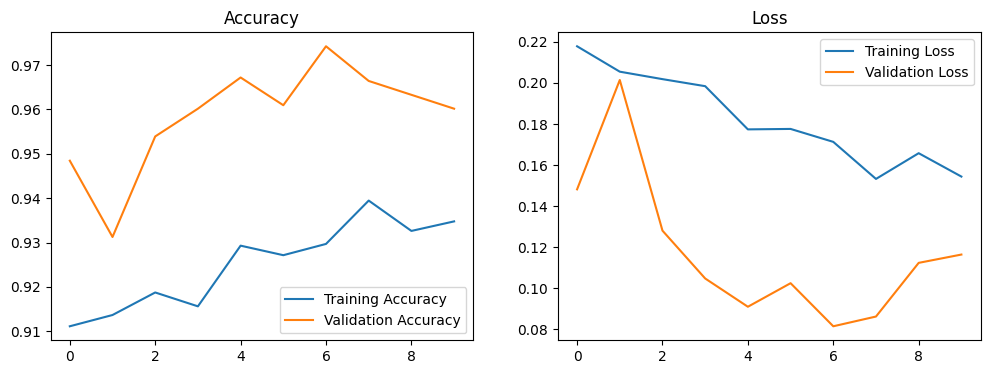

In [82]:
# Plot Accuracy and Loss
import matplotlib.pyplot as plt

loss, accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

def plot_history(history):
    plt.figure(figsize=(12, 4))
    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy')
    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Loss')
    plt.show()

plot_history(history)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Classification Report:
                  precision    recall  f1-score   support

    MildDemented       0.92      0.94      0.93       179
ModerateDemented       0.00      0.00      0.00        13
     NonDemented       0.96      0.99      0.98       640
VeryMildDemented       0.97      0.95      0.96       448

        accuracy                           0.96      1280
       macro avg       0.71      0.72      0.72      1280
    weighted avg       0.95      0.96      0.96      1280



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


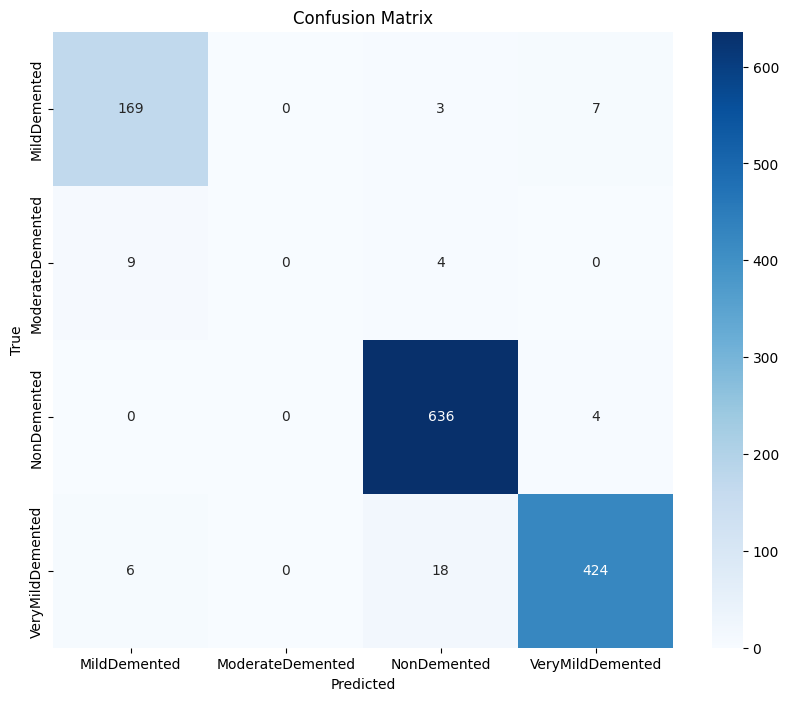

In [83]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

y_true = np.argmax(test_labels, axis=1)
predictions = model.predict(test_dataset)
y_pred = np.argmax(predictions, axis=1)

# Classification Report
class_names = classes
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [96]:
model

<Sequential name=sequential, built=True>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Class: 2


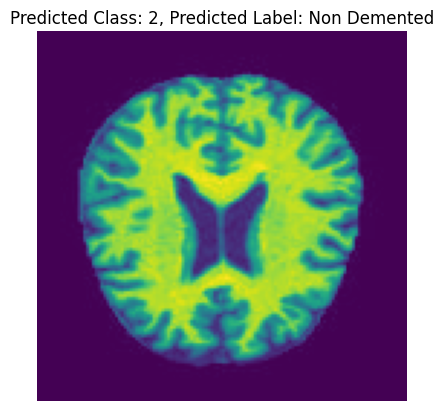

In [97]:


from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Testing on a Single Image
test_image_path = '/content/Alzheimer_s Dataset/test/NonDemented/non.jpg'
test_image = preprocess_image(test_image_path)
test_image = tf.expand_dims(test_image, axis=0)  # Adding batch dimension

prediction = model.predict(test_image)
predicted_class = label_binarizer.inverse_transform(prediction)[0]
print(f"Predicted Class: {predicted_class}")

if predicted_class==0:
    pred_label="Mild Dementia"
elif predicted_class==1:
    pred_label="Moderate Dementia"
elif predicted_class==2:
    pred_label="Non Demented"
else:
    pred_label="Very Mild Dementia"

# Display Image + Prediction
plt.imshow(plt.imread(test_image_path))
plt.title(f"Predicted Class: {predicted_class}, Predicted Label: {pred_label}")
plt.axis('off')
plt.show()



Found 6400 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step
CNN Test Accuracy: 0.9652
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step
ConvNeXT Test Accuracy: 0.5225


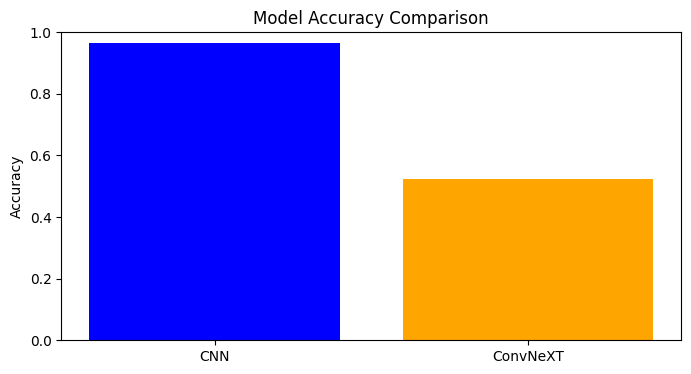

In [93]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score

# 1. Load your saved models
def load_model(model_path):
    try:
        return tf.keras.models.load_model(model_path)
    except:
        print(f"Error loading {model_path}")
        return None

cnn_model = load_model('/content/alzheimers_detection_model_new.h5')  # Replace with your CNN path
convnext_model = load_model('/content/best_model.h5')  # Replace with ConvNeXT path

# 2. Prepare test data (assuming you have ImageDataGenerator)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/Alzheimer_s Dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# 3. Get true labels
y_true = test_generator.classes

# 4. Predict and compare
results = {}
for name, model in [('CNN', cnn_model), ('ConvNeXT', convnext_model)]:
    if model:
        y_pred = np.argmax(model.predict(test_generator), axis=1)
        acc = accuracy_score(y_true, y_pred)
        results[name] = acc
        print(f"{name} Test Accuracy: {acc:.4f}")
    else:
        print(f"{name} model not loaded")

# 5. Visual comparison
if results:
    plt.figure(figsize=(8, 4))
    plt.bar(results.keys(), results.values(), color=['blue', 'orange'])
    plt.title('Model Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.show()
else:
    print("No models available for comparison")